<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/impulse_regime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
START = "2023-01-01"  #yyyy-mm-dd
#END = '2023-08-01'
START_testing='2021-09-01'

In [2]:
import yfinance as yf
tker = '^nsei' #'^nsei'
df =yf.download(tker,start=START)
#nifty=quandl.get('BSE/BOM500112',start_date=START,end_date=END,authtoken='1Mz3xLNFNdUpKENCkArB')
#nifty = pdr.get_data_yahoo(tker, start=START, end=END)
df=df.dropna()
df=df.iloc[:,:4]


[*********************100%%**********************]  1 of 1 completed


In [3]:
import pandas as pd
#



def calculate_macd(data, fastperiod=12, slowperiod=26, signalperiod=9):
    # Calculate the short-term EMA
    short_ema = data['Close'].ewm(span=fastperiod, adjust=False).mean()

    # Calculate the long-term EMA
    long_ema = data['Close'].ewm(span=slowperiod, adjust=False).mean()

    # Calculate the MACD line
    macd_line = short_ema - long_ema

    # Calculate the signal line (9-day EMA of MACD line)
    signal_line = macd_line.ewm(span=signalperiod, adjust=False).mean()

    # Calculate MACD Histogram
    macd_histogram = macd_line - signal_line

    return macd_line, signal_line, macd_histogram

def calculate_impulse_signals(data):
    # Calculate 13-period EMA
    data['ema_13'] = data['Close'].ewm(span=13, adjust=False).mean()

    # Calculate MACD and MACD Histogram
    data['macd'], data['signal_line'], data['macd_histogram'] = calculate_macd(data)

    # Calculate previous values for comparison
    data['prev_ema_13'] = data['ema_13'].shift(1)
    data['prev_macd_histogram'] = data['macd_histogram'].shift(1)

    # Initialize color column with 'blue'
    data['color'] = 0

    # Green Price Bar condition
    green_condition = (data['ema_13'] > data['prev_ema_13']) & (data['macd_histogram'] > data['prev_macd_histogram'])
    data.loc[green_condition, 'color'] = 1

    # Red Price Bar condition
    red_condition = (data['ema_13'] < data['prev_ema_13']) & (data['macd_histogram'] < data['prev_macd_histogram'])
    data.loc[red_condition, 'color'] = -1

    return data

# Example usage:
# Assuming you have a DataFrame 'df' with 'Date' and 'Close' columns
# df = pd.read_csv('your_data.csv')
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Calculate impulse signals
df_impulse = calculate_impulse_signals(df)




In [4]:
df_impulse.tail(2)

,Open,High,Low,Close,ema_13,macd,signal_line,macd_histogram,prev_ema_13,prev_macd_histogram,color
Date,,,,,,,,,,,
2024-01-16,22080.50,22124.150391,21969.800781,22032.300781,21711.740306,321.095152,330.853690,-9.758538,21658.313560,-16.962687,1
2024-01-17,21647.25,21851.500000,21550.449219,21571.949219,21691.770150,284.445629,321.572078,-37.126449,21711.740306,-9.758538,-1


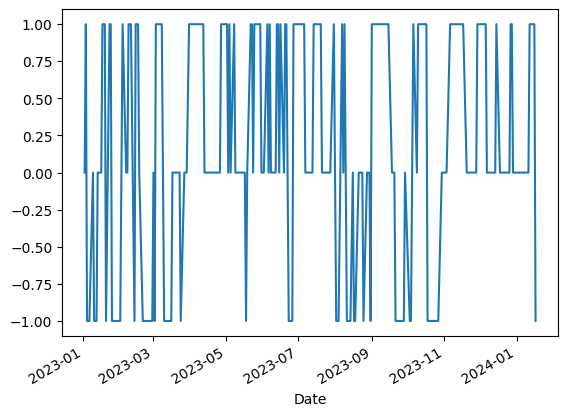

In [5]:
df_impulse.color.plot();

In [6]:
df_impulse['color'].iloc[-5:]

Date
2024-01-11    0
2024-01-12    1
2024-01-15    1
2024-01-16    1
2024-01-17   -1
Name: color, dtype: int64